In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
sns.set()


## Dataset loading and description

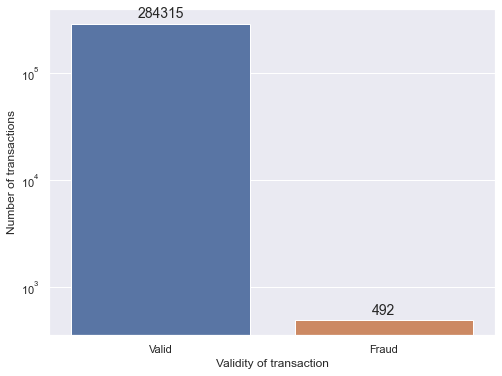

In [109]:
data = pd.read_csv("creditcard.csv")

plt.figure(figsize=(8, 6))
bars = sns.barplot(x=data["Class"].unique(),y=data["Class"].value_counts(),data=data, log = True)
for b in bars.patches:
    bars.annotate(int(b.get_height()), 
                   (b.get_x() + b.get_width() / 2., b.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   size = 14,
                   textcoords = 'offset points')
plt.xlabel("Validity of transaction")
plt.ylabel("Number of transactions")
plt.xticks(range(2),labels = ["Valid", "Fraud"], rotation = 0)
plt.show()



In [91]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [92]:
X = data.iloc[:,1:-2].values
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Model description

### Logistic regression model

In [97]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
logreg = LogisticRegression().fit(X_train, y_train)

# Calculate the test set predictions
log_predictions = logreg.predict(X_test)

# Checks the test set predictions for unique values
np.unique(log_predictions, return_counts=False)

array([0, 1], dtype=int64)

In [94]:
# Check the regression parameters, training and test precision
# Training nad test set model accuracy
print ('Accuracy from sk-learn on Training data: {0:.2f}%'.format(logreg.score(X_train, y_train)*100))
print ('Accuracy from sk-learn on Test data: {0:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy from sk-learn on Training data: 99.92%
Accuracy from sk-learn on Test data: 99.93%


### Dummy Classifier model

In [98]:
from sklearn.dummy import DummyClassifier

# Create and train the Dummy model
dummy_major = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)

# Calculate the test set Dummy predictions
dummy_major_predictions = dummy_major.predict(X_test)

# Checks the Dummy predictions for unique values
np.unique(dummy_major_predictions, return_counts=False)



array([0], dtype=int64)

In [99]:
print ('Accuracy from most frequent DummyClassifier on Training data: {0:.2f}%'.format(dummy_major.score(X_train, y_train)*100))
print ('Accuracy from most frequent DummyClassifier on Test data: {0:.2f}%'.format(dummy_major.score(X_test, y_test)*100))

Accuracy from most frequent DummyClassifier on Training data: 99.83%
Accuracy from most frequent DummyClassifier on Test data: 99.83%


## Model Evaluation

### Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for Logistic Regression model
conf_matrix_log = confusion_matrix(y_test, log_predictions)

conf_matrix_log


array([[71072,    10],
       [   40,    80]], dtype=int64)

In [110]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Dummy Classifier
conf_matrix_dummy = confusion_matrix(y_test, dummy_major_predictions)

conf_matrix_dummy

array([[71082,     0],
       [  120,     0]], dtype=int64)

### Accuracy

In [125]:
from sklearn.metrics import accuracy_score

print ('Accuracy - Logistic Regression: {0:.4f}'.format(accuracy_score(y_test, log_predictions)))
print ('Accuracy - Dummy Classifier: {0:.4f}'.format(accuracy_score(y_test, dummy_major_predictions)))

Accuracy - Logistic Regression: 0.9993
Accuracy - Dummy Classifier: 0.9983


In [126]:
from sklearn.metrics import accuracy_score

print ('Classification Error - Logistic Regression: {0:.4f}'.format((1-accuracy_score(y_test, log_predictions))))
print ('Classification Error - Dummy Classifier: {0:.4f}'.format((1-accuracy_score(y_test, dummy_major_predictions))))

Classification Error - Logistic Regression: 0.0007
Classification Error - Dummy Classifier: 0.0017


### Recall

In [130]:
from sklearn.metrics import recall_score

print ('Recall - Logistic Regression: {0:.4f}'.format(recall_score(y_test, log_predictions)))
print ('Recall - Dummy Classifier: {0:.4f}'.format(recall_score(y_test, dummy_major_predictions)))

Recall - Logistic Regression: 0.6667
Recall - Dummy Classifier: 0.0000


### Precision


In [132]:
from sklearn.metrics import precision_score

print ('Precision - Logistic Regression: {0:.4f}'.format(precision_score(y_test, log_predictions)))
print ('Precision - Dummy Classifier: {0:.4f}'.format(precision_score(y_test, dummy_major_predictions)))

Precision - Logistic Regression: 0.8889
Precision - Dummy Classifier: 0.0000


C:\Users\karlo\anaconda3\envs\ml_courses\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### FPR

In [139]:
# Calculate the confusion matrix for Logistic Regression model
conf_matrix_log = confusion_matrix(y_test, log_predictions)

FPR_logreg = conf_matrix_log[0][1] / (conf_matrix_log[0][0] + conf_matrix_log[0][1])

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Dummy Classifier
conf_matrix_dummy = confusion_matrix(y_test, dummy_major_predictions)

FPR_dummy = conf_matrix_dummy[0][1] / (conf_matrix_dummy[0][0] + conf_matrix_dummy[0][1])

print ('FPR - Logistic Regression: {0:.5f}'.format(FPR_logreg))
print ('FPR - Dummy: {0:.5f}'.format(FPR_dummy))

FPR - Logistic Regression: 0.00014
FPR - Dummy: 0.00000


### F1 score

In [142]:
from sklearn.metrics import f1_score

print ('F1-score - Logistic Regression: {0:.4f}'.format(f1_score(y_test, log_predictions)))
print ('F1_score - Dummy Classifier: {0:.4f}'.format(f1_score(y_test, dummy_major_predictions)))

F1-score - Logistic Regression: 0.7619
F1_score - Dummy Classifier: 0.0000


### Classification report

In [149]:
from sklearn.metrics import classification_report

print ("CLassification report - Logistic Regression\n", 
       classification_report(y_test, log_predictions, target_names = ["VALID", "FRAUD"]))
print ("CLassification report - Dummy Classifier\n", 
       classification_report(y_test, dummy_major_predictions, target_names = ["Dummy - VALID", "Dummy - FRAUD"]))


CLassification report - Logistic Regression
               precision    recall  f1-score   support

       VALID       1.00      1.00      1.00     71082
       FRAUD       0.89      0.67      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202

CLassification report - Dummy Classifier
                precision    recall  f1-score   support

Dummy - VALID       1.00      1.00      1.00     71082
Dummy - FRAUD       0.00      0.00      0.00       120

     accuracy                           1.00     71202
    macro avg       0.50      0.50      0.50     71202
 weighted avg       1.00      1.00      1.00     71202



C:\Users\karlo\anaconda3\envs\ml_courses\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
